In [1]:
import os
import pandas as pd

In [2]:

#https://stackoverflow.com/questions/36183486/importerror-no-module-named-google

%load_ext google.cloud.bigquery

In [3]:
from google.cloud import bigquery



In [4]:
#Your credentials to google cloud
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"my-project-348716-29f69b900233.json"
# git token
TOKEN = ""  # Replace with your token


In [5]:
bqclient = bigquery.Client()



In [6]:
# Download query results.
# query_string = """
# SELECT
# CONCAT(
#     'https://stackoverflow.com/questions/',
#     CAST(id as STRING)) as url,
# view_count
# FROM `bigquery-public-data.stackoverflow.posts_questions`
# WHERE tags like '%google-bigquery%'
# ORDER BY view_count DESC
# """

query_string = """
SELECT
q.tags question_tag, q.id question_id, q.title question_title, q.body question_body, p.id answer_id, p.body
FROM `bigquery-public-data.stackoverflow.posts_questions` as q 
LEFT JOIN `bigquery-public-data.stackoverflow.posts_answers` as p
ON p.parent_id = q.id
WHERE p.body LIKE '%Verilog%'
LIMIT 100000;
"""

query_string = """
SELECT
p.id answer_id, p.body FROM `bigquery-public-data.stackoverflow.posts_answers` as p
WHERE p.body LIKE '%Verilog%'
"""
# where regexp_contains(q.tags, 'Verilog')
# WHERE tags like '%Verilog%'
dataframe = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
        create_bqstorage_client=True,
    )
)
print(dataframe.head())

   answer_id                                               body
0   56573639  <p>I replaced the Verilog module with a System...
1   56465607  <p>This is an unimplemented feature of SystemV...
2   56519429  <p>Verilog simulation is event driven. Event i...
3   56773222  <p>It is illegal to use Verilog Hierarchical R...
4   56860718  <p><code>Div_num_tb</code> has been defined as...


In [26]:
dataframe.shape

(2986, 2)

In [9]:
query_string="""
SELECT f.repo_name, f.path, c.copies, c.size, c.content
 FROM `bigquery-public-data.github_repos.files` AS f 
 JOIN `bigquery-public-data.github_repos.contents` AS c 
 ON f.id = c.id 
 WHERE 
 NOT c.binary 
 AND ((f.path LIKE '%.v') 
 AND (c.content LIKE '%endmodule%'
 OR c.content LIKE '%always%')
 AND (c.size BETWEEN 10 
 AND 1048575))
"""

In [6]:
query_string="""
select q.tags question_tag, q.id question_id, q.title question_title, q.body question_body, a.id answer_id, a.body from `bigquery-public-data.stackoverflow.posts_questions` as q
left join
`bigquery-public-data.stackoverflow.posts_answers` as a
on a.parent_id = q.id
where regexp_contains(q.tags, 'Verilog');
"""

In [7]:
def query(query_string):
    
    dataframe = (
        bqclient.query(query_string)
        .result()
        .to_dataframe(
            # Optionally, explicitly request to use the BigQuery Storage API. As of
            # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
            # API is used by default.
            create_bqstorage_client=True,
        )
    )
    print(dataframe.head())
    
    return dataframe

In [7]:
dataframe.shape

NameError: name 'dataframe' is not defined

In [24]:
dataframe.to_csv( '/Volumes/GoogleDrive/My Drive/sg0_workspace/datasets/verilog_github_contains_always_module_multicopies.csv',index=False)

In [28]:
dataframe.to_csv( '/Volumes/GoogleDrive/My Drive/sg0_workspace/datasets/verilog_github_contains_always_module.csv',index=False)

In [32]:
dataframe.to_csv( '/Volumes/GoogleDrive/My Drive/sg0_workspace/datasets/verilog_github_contains_always_or_endmodule.csv',index=False)

In [8]:
query_string= """SELECT language
            FROM `bigquery-public-data.github_repos.languages`
            
        """

In [9]:
dataframe=query(query_string)

                                            language
0                     [{'name': 'C', 'bytes': 1466}]
1                    [{'name': 'C', 'bytes': 93643}]
2  [{'name': 'C', 'bytes': 115}, {'name': 'C#', '...
3  [{'name': 'C', 'bytes': 2984677}, {'name': 'C#...
4  [{'name': 'C', 'bytes': 260567}, {'name': 'C#'...


In [10]:
dataframe.shape

(3325634, 1)

In [11]:
dataframe.iloc[-1]

language    [{'name': 'Objective-C', 'bytes': 51245}, {'na...
Name: 3325633, dtype: object

In [13]:
Languages_count={}
for lang in languagesList:
    if lang["name"] not in Languages_count:
        Languages_count[lang["name"]]=0
    Languages_count[lang["name"]]+=1
#Languages_count

In [14]:
2987/sum(Languages_count.values())

0.00038102945305371446

In [12]:

languagesList=[]
for lang in dataframe.language:
    languagesList.extend(lang)
languagesList[:5]

[{'name': 'C', 'bytes': 1466},
 {'name': 'C', 'bytes': 93643},
 {'name': 'C', 'bytes': 115},
 {'name': 'C#', 'bytes': 1844},
 {'name': 'C++', 'bytes': 9653}]

In [15]:
import operator
sorted_Languages_counts = sorted(Languages_count.items(), key=operator.itemgetter(1),reverse=True)
sorted_Languages_counts[:200]

[('JavaScript', 1099966),
 ('CSS', 807826),
 ('HTML', 777433),
 ('Shell', 640886),
 ('Python', 550905),
 ('Ruby', 374276),
 ('Java', 369673),
 ('PHP', 339426),
 ('C', 293231),
 ('C++', 277871),
 ('Makefile', 251366),
 ('Objective-C', 166961),
 ('C#', 133110),
 ('Perl', 101533),
 ('Batchfile', 97868),
 ('Go', 91867),
 ('CoffeeScript', 68589),
 ('ApacheConf', 68500),
 ('CMake', 56754),
 ('TypeScript', 48027),
 ('Assembly', 47681),
 ('Swift', 42605),
 ('Scala', 34562),
 ('Lua', 34431),
 ('PowerShell', 33176),
 ('ASP', 32781),
 ('XSLT', 32226),
 ('TeX', 31554),
 ('Haskell', 30061),
 ('R', 29356),
 ('Groovy', 27229),
 ('Dockerfile', 27176),
 ('Clojure', 25896),
 ('Groff', 25635),
 ('Awk', 20625),
 ('Arduino', 20424),
 ('VimL', 18977),
 ('Objective-C++', 17946),
 ('Matlab', 17524),
 ('QMake', 17506),
 ('Smarty', 17346),
 ('Jupyter Notebook', 17332),
 ('Emacs Lisp', 16755),
 ('Rust', 15907),
 ('M4', 15776),
 ('Puppet', 14936),
 ('Erlang', 14909),
 ('GLSL', 13904),
 ('Yacc', 13695),
 ('Scilab'

Text(0.5, 1.0, 'Language Popularity Score')

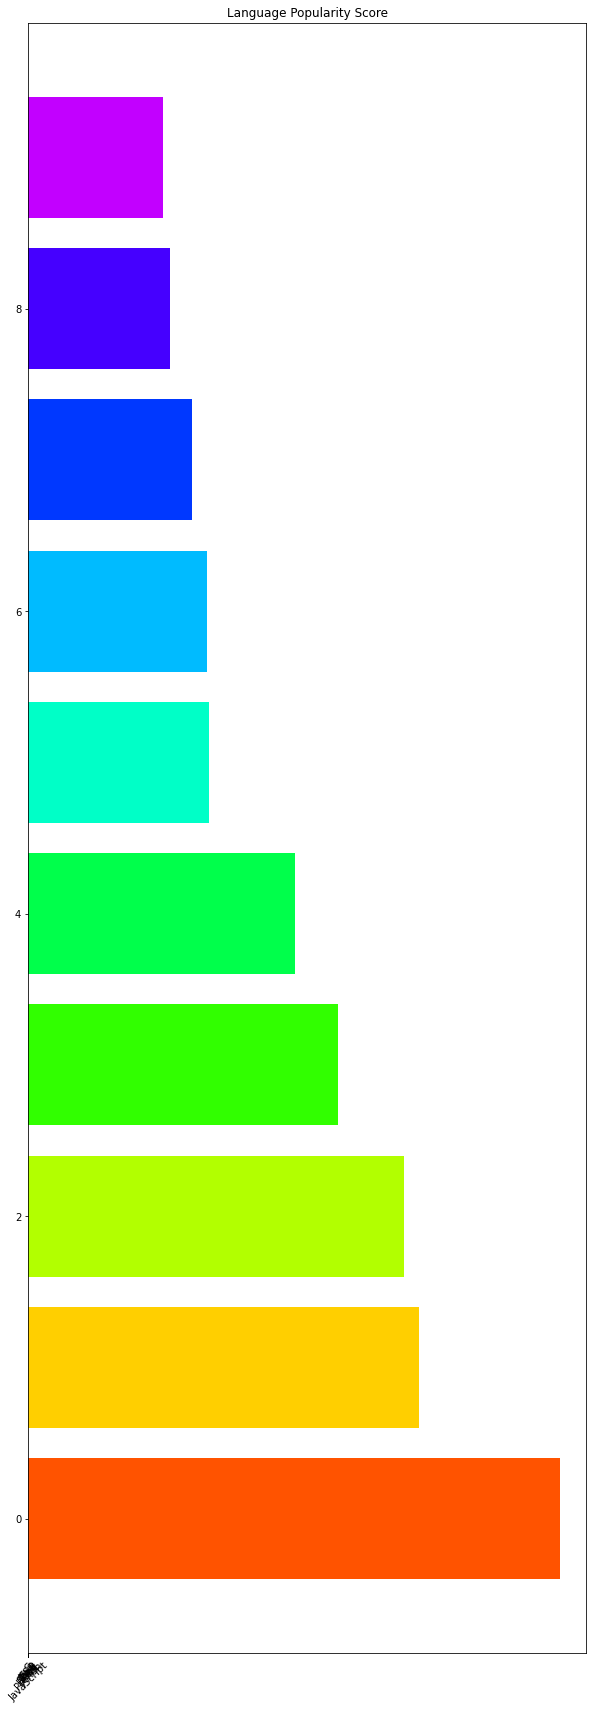

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
language = list(zip(*sorted_Languages_counts[:10]))[0]
count = list(zip(*sorted_Languages_counts[:10]))[1]
x_pos = np.arange(len(language))


# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, count, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(10,30))
# plt.plot(x_pos, trendline, color='black', linestyle='--')    
plt.barh(x_pos, count,align='center',color=sns.color_palette("gist_rainbow",len(x_pos)))
plt.xticks(x_pos, language,rotation=45) 
plt.title('Language Popularity Score')
# plt.savefig('github-language-popularity.png');

In [24]:
print(sorted_Languages_counts)

[('JavaScript', 1099966), ('CSS', 807826), ('HTML', 777433), ('Shell', 640886), ('Python', 550905), ('Ruby', 374276), ('Java', 369673), ('PHP', 339426), ('C', 293231), ('C++', 277871), ('Makefile', 251366), ('Objective-C', 166961), ('C#', 133110), ('Perl', 101533), ('Batchfile', 97868), ('Go', 91867), ('CoffeeScript', 68589), ('ApacheConf', 68500), ('CMake', 56754), ('TypeScript', 48027), ('Assembly', 47681), ('Swift', 42605), ('Scala', 34562), ('Lua', 34431), ('PowerShell', 33176), ('ASP', 32781), ('XSLT', 32226), ('TeX', 31554), ('Haskell', 30061), ('R', 29356), ('Groovy', 27229), ('Dockerfile', 27176), ('Clojure', 25896), ('Groff', 25635), ('Awk', 20625), ('Arduino', 20424), ('VimL', 18977), ('Objective-C++', 17946), ('Matlab', 17524), ('QMake', 17506), ('Smarty', 17346), ('Jupyter Notebook', 17332), ('Emacs Lisp', 16755), ('Rust', 15907), ('M4', 15776), ('Puppet', 14936), ('Erlang', 14909), ('GLSL', 13904), ('Yacc', 13695), ('Scilab', 13050), ('Lex', 12506), ('Roff', 12132), ('Prot

([<matplotlib.axis.XTick at 0x33bd92020>,
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'CSS'),
  Text(2, 0, 'HTML'),
  Text(3, 0, 'Shell'),
  Text(4, 0, 'Python'),
  Text(5, 0, 'Ruby'),
  Text(6, 0, 'Java'),
  Text(7, 0, 'PHP'),
  Text(8, 0, 'C'),
  Text(9, 0, 'C++'),
  Text(10, 0, 'Makefile'),
  Text(11, 0, 'Objective-C'),
  Text(12, 0, 'C#'),
  Text(13, 0, 'Perl'),
  Text(14, 0, 'Batchfile'),
  Text(15, 0, 'Go'),
  Text(16, 0, 'CoffeeScript'),
  Text(17, 0, 'ApacheConf'),
  Text(18, 0, 'CMake'),
  Text(19, 0, 'TypeScript'),
  Text(20, 0, 'Assembly'),
  Text(21, 0, 'Swift'),
  Text(22, 0, 'Scala'),
  Text(23, 0, 'Lua'),
  Text(24, 0, 'PowerShell'),
  Text(25, 0, 'ASP'),
  Text(26, 0, 'XSLT'),
  Text(27, 0, 'TeX'),
  Text(28, 0, 'Haskell'),
  Text(29, 0, 'R'),
  Text(30, 0, 'Groovy'),
  Text(31, 0, 'Dockerfile'),
  Text(32, 0, 'Clojure'),
  Text(33, 0, 'Groff'),
  Text(34, 0, 'Awk'),
  Text(35, 0, 'Arduino'),
  Text(36, 0, 'VimL'),
  Text(37, 0, 'Objective-C++'),
  Text(38, 0, 'Matlab'),
 

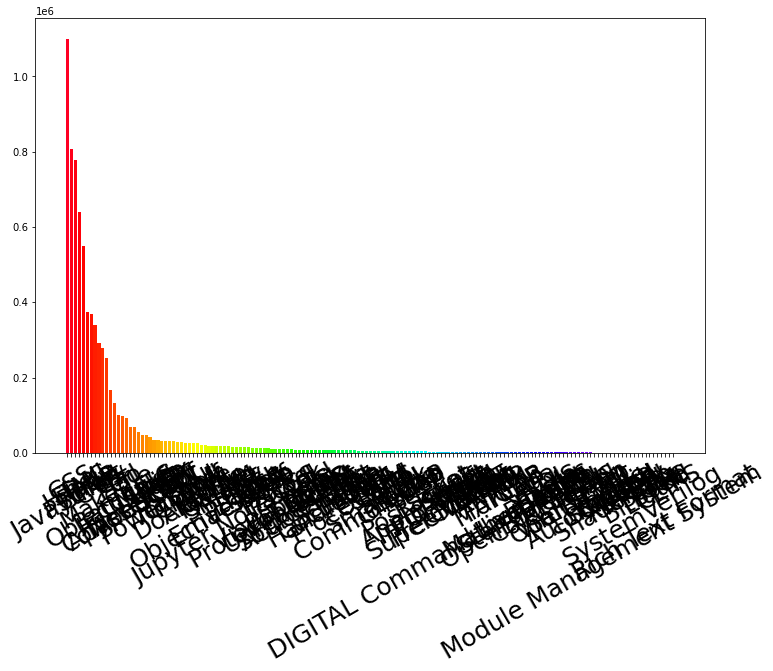

In [25]:

language = list(zip(*sorted_Languages_counts[:155]))[0]
count = list(zip(*sorted_Languages_counts[:155]))[1]
x_pos = np.arange(len(language))

plt.figure(figsize=(12,8))
# plt.plot(x_pos, trendline, color='black', linestyle='--')    
plt.bar(x_pos, count,align='center',color=sns.color_palette("gist_rainbow",len(x_pos)))
plt.xticks(x_pos, language,rotation=30, fontsize=25) 
# plt.xlabel(fontsize=40)
# plt.title('Language Popularity Score')
# plt.savefig('github-language-popularity.svg',transparent=True);

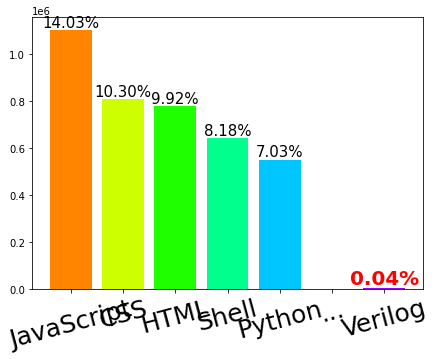

In [37]:
# Calculate the total count for all languages
total_count = sum(count for _, count in sorted_Languages_counts)

# Find the index of Verilog
verilog_index = next(i for i, v in enumerate(sorted_Languages_counts) if v[0] == 'Verilog')

# Number of initial languages to display
initial_display_count = 5

# Create a new list with the first few languages, placeholder, and Verilog
selected_languages_counts = sorted_Languages_counts[:initial_display_count] + [('...', 0), sorted_Languages_counts[verilog_index]]

# Unpack languages and counts
language, count = zip(*selected_languages_counts)
x_pos = np.arange(len(language))

# Plot
plt.figure(figsize=(7,5))
bars = plt.bar(x_pos, count, align='center', color=sns.color_palette("gist_rainbow", len(x_pos)))
plt.xticks(x_pos, language, rotation=15, fontsize=25)

# Annotate bars with percentage
for idx, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    if language[idx] == 'Verilog':  # Highlight Verilog
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=20, fontweight='bold', color='red')
    elif language[idx] != '...':  # Avoid annotating '...'
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=15)

plt.show()

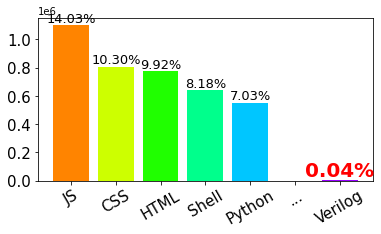

In [53]:
# Updating the data to reflect the change for JavaScript to JS
updated_sorted_Languages_counts = [(('JS' if lang == 'JavaScript' else lang), count) for lang, count in sorted_Languages_counts]

# Find the index of Verilog in the updated list
verilog_index = next(i for i, v in enumerate(updated_sorted_Languages_counts) if v[0] == 'Verilog')

# Number of initial languages to display
initial_display_count = 5

# Create a new list with the first few languages, placeholder, and Verilog
selected_languages_counts = updated_sorted_Languages_counts[:initial_display_count] + [('...', 0), updated_sorted_Languages_counts[verilog_index]]

# Unpack languages and counts
language, count = zip(*selected_languages_counts)
x_pos = np.arange(len(language))

# Plot
plt.figure(figsize=(6,3))
bars = plt.bar(x_pos, count, align='center', color=sns.color_palette("gist_rainbow", len(x_pos)))

# Annotate bars with percentage
for idx, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    if language[idx] == 'Verilog':  # Highlight Verilog
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=20, fontweight='bold', color='red')
    elif language[idx] != '...':  # Avoid annotating '...'
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=13)

plt.yticks( fontsize=15)

plt.xticks(x_pos, language, rotation=30, fontsize=15)
plt.savefig('github-language-popularity.svg', bbox_inches='tight');
plt.savefig('github-language-popularity.pdf');

plt.show()


In [22]:
pwd

'/Users/shailjathakur'

In [55]:
# verilog from stack overflow

In [56]:
query_string = """
SELECT
CONCAT(
    'https://stackoverflow.com/questions/',
    CAST(id as STRING)) as url,
view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE ((tags like '%verilog%')
or (tags like '%beginmodule%' and tags like '%endmodule%' and tags like '%always%')
)
ORDER BY view_count DESC
"""

<Figure size 432x288 with 0 Axes>

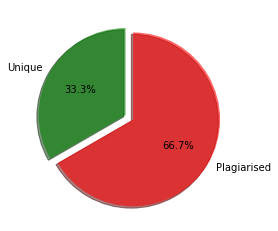

<Figure size 3600x3600 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = 'Unique', 'Plagiarised'
sizes = [15, 30]
fig = plt.gcf()
fig, ax = plt.subplots()
plt.figure(figsize=(50,50))

ax.pie(sizes, explode=explode, labels=labels,colors=['green', 'red'], autopct='%1.1f%%',
        shadow=True, startangle=90,wedgeprops={'alpha':0.6})
# plt.savefig('pie_plagiarism.svg',transparent=True,bbox_inches='tight', format="svg")
plt.savefig('pie_plagiarism.png',transparent=True,bbox_inches='tight')

# plt.show()